# Project 8 -- Aayushi Akhouri

## Question 1

In [ ]:
library(data.table)

In [ ]:
interactions <- fread("/depot/datamine/data/goodreads/csv/interactions_subset.csv")

In [ ]:
get_probability_of_review(interactions_dataset = interactions, userID = 5000, min_rating = 3)

The books published in the month of November had the highest rating whereas the books published in January had the lowest rating.

Dr Ward should release his book in November as it will get the highest average ratings.

## Question 2

In [32]:
names(books)

[1] "isbn"                 "author_id"            "text_reviews_count"  
 [4] "country_code"         "language_code"        "asin"                
 [7] "is_ebook"             "average_rating"       "kindle_asin"         
[10] "description"          "format"               "link"                
[13] "publisher"            "num_pages"            "publication_day"     
[16] "isbn13"               "publication_month"    "edition_information" 
[19] "publication_year"     "url"                  "image_url"           
[22] "book_id"              "ratings_count"        "work_id"             
[25] "title"                "title_without_series"

In [21]:
books$book_size_cat<- NA

In [22]:
books$book_size_cat[books$num_page <= 100]<- "small"

In [23]:
books$book_size_cat[(books$num_page > 100)&(books$num_pages<=400)]<- "medium"

In [24]:
books$book_size_cat[books$num_page > 400]<- "large"

In [25]:
table(books$book_size_cat, useNA= "always")


 large medium  small   <NA> 
 99079 466681 110311 323929 

In [26]:
summary(books$num_pages)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
     0.0    147.0    245.0    264.3    344.0 945077.0   323929 

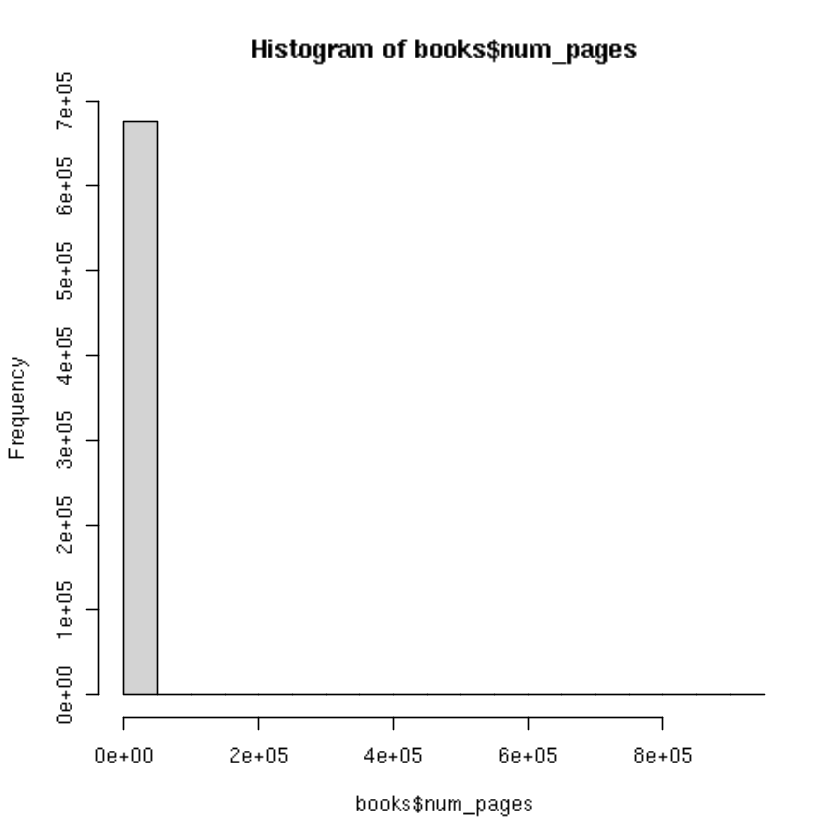

In [27]:
hist(books$num_pages)

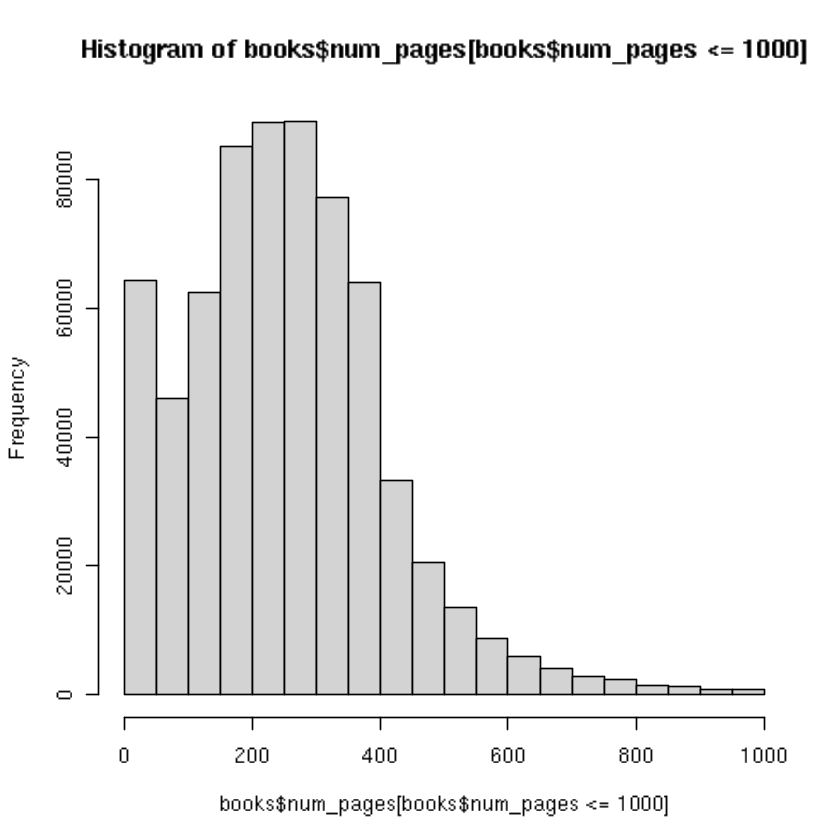

In [28]:
hist(books$num_pages[books$num_pages <= 1000])

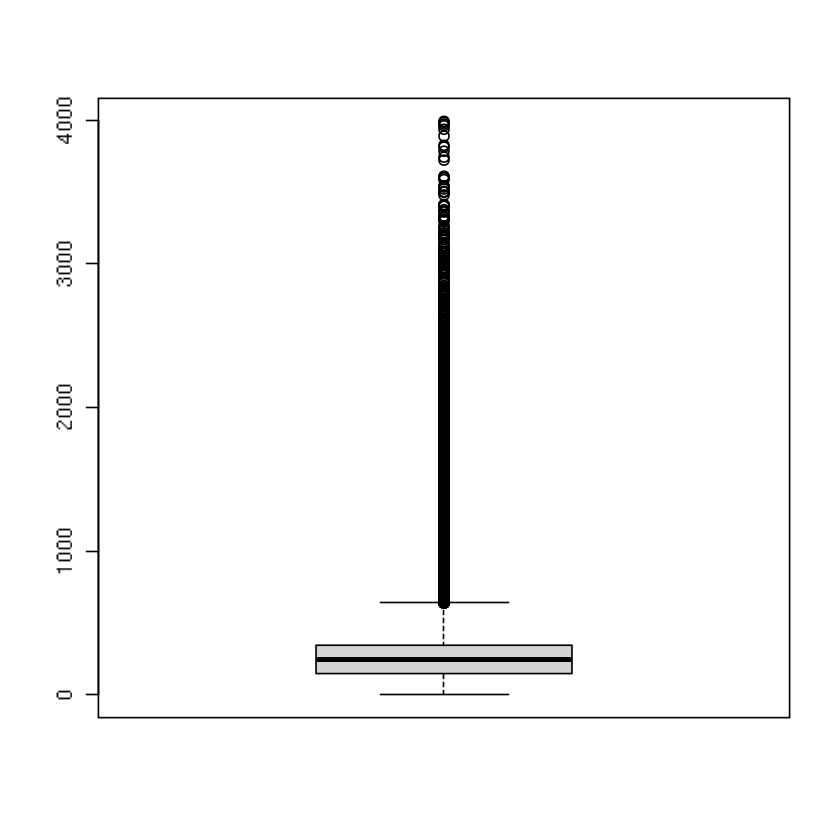

In [41]:
boxplot(books$num_pages[books$num_pages < 4000])

Several books have 200-400 pages.

## Question 3

In [42]:
tapply(books$text_reviews_count ,books$book_size_cat , mean)

large   medium    small 
58.81737 35.92221 14.28905

I would suggest Dr Ward publish a large book because it gets the most reviews and even if some of the reviews were negative the book would still get publicity.

## Question 4

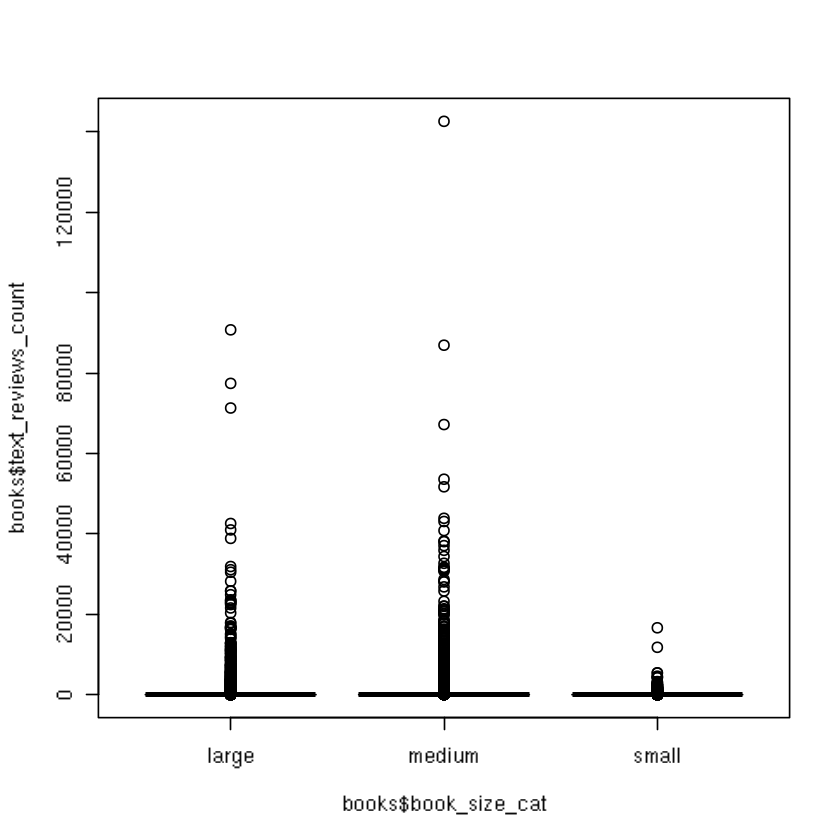

In [29]:
boxplot(books$text_reviews_count ~ books$book_size_cat)

Most books got reviews below 20000 and a medium book got the highest review. My answer to question 3 remains same after seeing the box plot.

## Question 5

In [46]:
dim(subset(books,text_reviews_count < 200))

[1] 982001     27

In [47]:
subs<-subset(books,text_reviews_count<200)

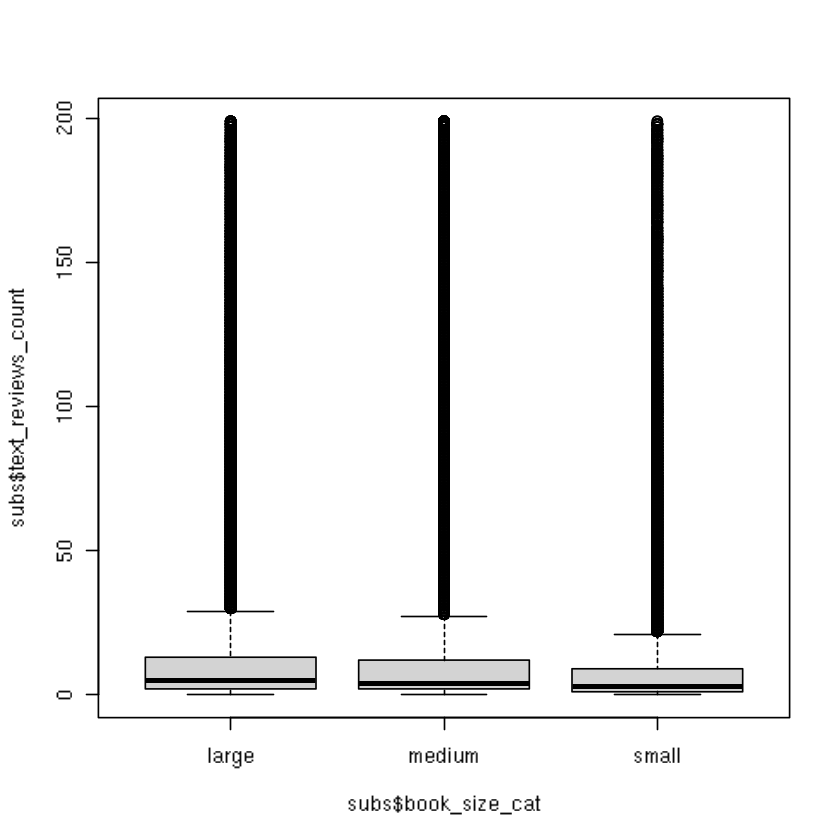

In [48]:
boxplot(subs$text_reviews_count ~ subs$book_size_cat)

It is a little easier to read than the previous plot and the averages can be read more easily.

## Question 6

In [5]:
 authors <-fread("/depot/datamine/data/goodreads/csv/goodreads_book_authors.csv")

In [6]:
head(authors)

average_rating,author_id,text_reviews_count,name,ratings_count
<dbl>,<dbl>,<int>,<chr>,<int>
3.98,604031,7,Ronald J. Fields,49
4.08,626222,28716,Anita Diamant,546796
3.92,10333,5075,Barbara Hambly,122118
3.68,9212,36262,Jennifer Weiner,888522
3.82,149918,96,Nigel Pennick,1740
3.89,3041852,85,Alfred J. Church,947


In [7]:
names(authors) %in% names(books)

[1]  TRUE  TRUE  TRUE FALSE  TRUE

In [31]:
books_authors <- merge(books, authors, by.x="author_id", by.y="author_id")

In [32]:
dim(books_authors)

[1] 1000000      31

In [33]:
newDF<-subset(books_authors , name %in% c("Stephenie Meyer", "Veronica Roth","Charles Dickens","Enid Blyton","William Shakespeare"))

In [34]:
dim(newDF)

[1] 2583   31

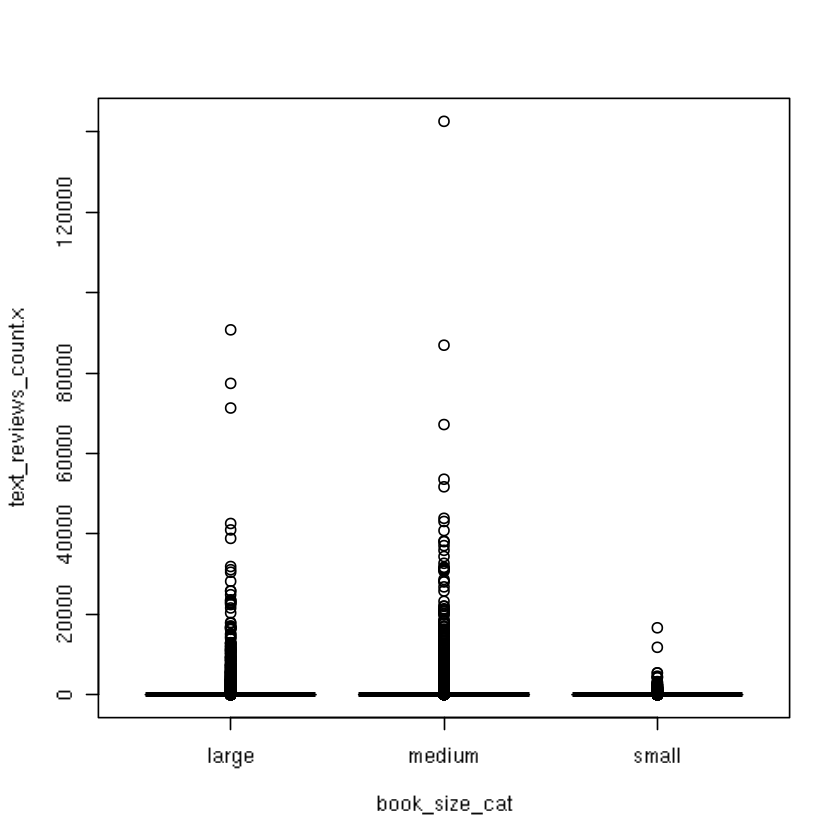

In [35]:
boxplot(text_reviews_count.x ~ book_size_cat , data=books_authors)

No my recommendation remains the same.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.